In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

Dataset shape: (10000, 14)

First 5 rows:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  

In [3]:
# Step 2: Distinguish features and target, split data
# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [4]:
# Encode categorical variables
le_geography = LabelEncoder()
le_gender = LabelEncoder()
df['Geography'] = le_geography.fit_transform(df['Geography'])
df['Gender'] = le_gender.fit_transform(df['Gender'])

In [5]:
# Features and target
X = df.drop('Exited', axis=1).values
y = df['Exited'].values

In [6]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTrain set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (8000, 10)
Test set shape: (2000, 10)


In [7]:
# Step 3: Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Step 4: Build and train the model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.3))  # Improvement: Dropout for regularization
model.add(Dense(6, activation='relu'))  # Hidden layer
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer

C:\Users\Aryan_Mule\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                     verbose=1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6591 - loss: 0.6549 - val_accuracy: 0.7994 - val_loss: 0.5169
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7736 - loss: 0.5441 - val_accuracy: 0.8000 - val_loss: 0.4812
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7873 - loss: 0.5075 - val_accuracy: 0.8000 - val_loss: 0.4663
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4989 - val_accuracy: 0.8000 - val_loss: 0.4582
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7916 - loss: 0.4849 - val_accuracy: 0.8000 - val_loss: 0.4521
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4828 - val_accuracy: 0.8000 - val_loss: 0.4492
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4706 - val_accuracy: 0.8000 - val_loss: 0.4438
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4661 - val_accu

In [11]:
# Step 5: Evaluate
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Test Accuracy: 0.8445

Confusion Matrix:
 [[1585    8]
 [ 303  104]]


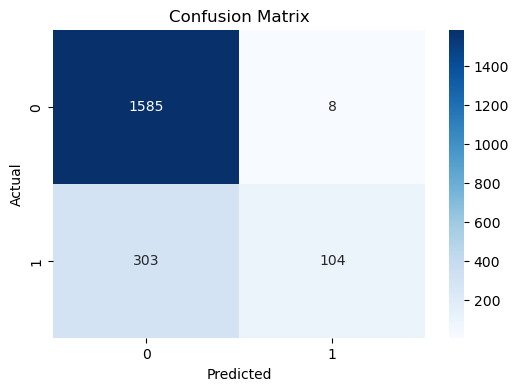

In [12]:
# Optional: Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

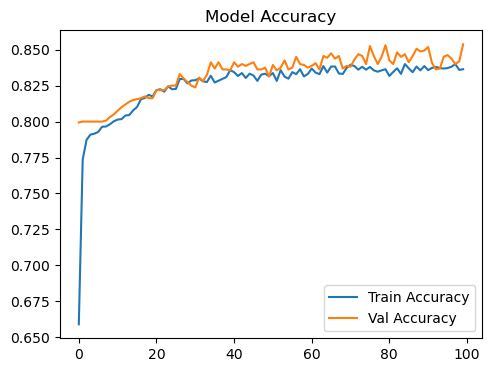

In [13]:
# Optional: Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()